# Online Food Prediction

## Step1. Data reading and preprocessing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read datasets
df = pd.read_csv('data/onlinefoods.csv')

In [5]:
df.info()
# Attributes
# Age年齡, Gender性別, Marital Status婚姻狀況, Occupation職業, Monthly Income月收入, Educational Qualifications學歷, 
# Family size家庭人數, latitude緯度, longitude經度, Pin codePin碼, Output訂單狀態, Feedback回饋, Unnamed: 12未命名

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [61]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [6]:
df.shape

(388, 13)

In [7]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [64]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


<Axes: title={'center': 'Online Food Order Decisions Based on the Age of the Customer'}, xlabel='Age', ylabel='Count'>

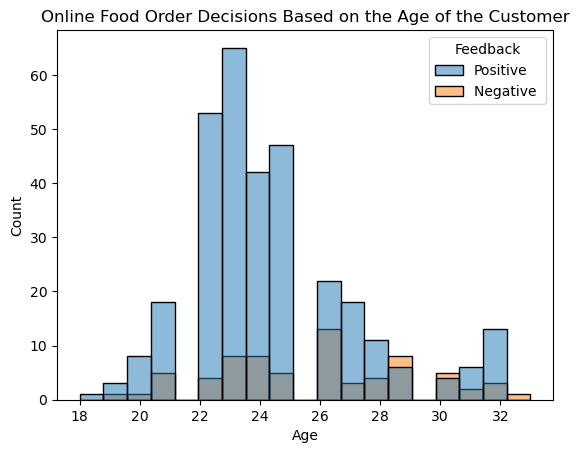

In [70]:
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.histplot(x="Age", hue="Feedback", data=df)

<Axes: title={'center': 'Online Food Order Decisions Based on the Size of the Family'}, xlabel='Family size', ylabel='Count'>

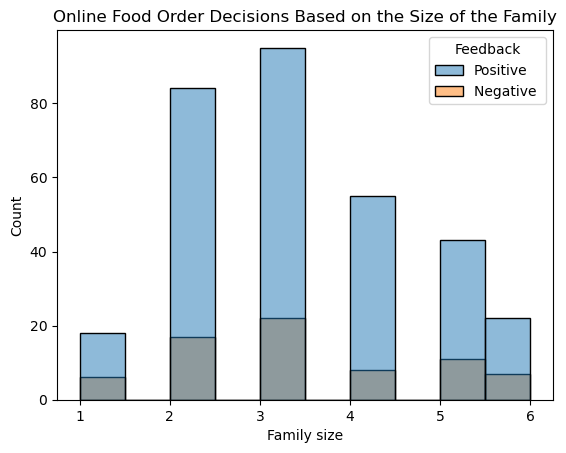

In [71]:
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.histplot(x="Family size", hue="Feedback", data=df)

In [79]:
buying_food_again = df.query("Output == 'Yes'")
buying_food_again.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


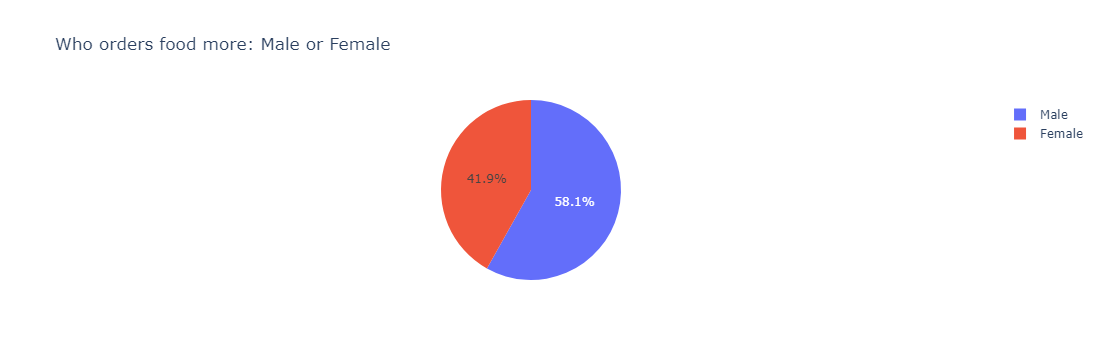

In [90]:
gender_counts = buying_food_again["Gender"].value_counts().reset_index()

fig = px.pie(gender_counts, values='count', names='Gender', title='Who orders food more: Male or Female')
fig.show()

## Step2. Converting all categorical to numerical values

In [8]:
df.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
Unnamed: 12                    object
dtype: object

In [9]:
df['Gender'] = df["Gender"].map({"Female": 0, "Male": 1})
df['Marital Status'] = df['Marital Status'].map({'Prefer not to say': 0, 'Single': 1, 'Married': 2})
df['Occupation'] = df['Occupation'].map({"Student": 1, "Employee": 2, "Self Employeed": 3, "House wife": 4})
df["Educational Qualifications"] = df["Educational Qualifications"].map({"Graduate": 1, "Post Graduate": 2, "Ph.D": 3, "School": 4, "Uneducated": 5})
df["Monthly Income"] = df["Monthly Income"].map({"No Income": 0, "10001 to 25000": 25, "25001 to 50000": 50, "More than 50000": 70, "Below Rs.10000": 100})
df["Feedback"] = df["Feedback"].map({"Negative ": 0, "Positive": 1})

In [10]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,1,1,0,2,4,12.9766,77.5993,560001,Yes,1,Yes
1,24,0,1,1,100,1,3,12.9770,77.5773,560009,Yes,1,Yes
2,22,1,1,1,100,2,3,12.9551,77.6593,560017,Yes,0,Yes
3,22,0,1,1,0,1,6,12.9473,77.5616,560019,Yes,1,Yes
4,22,1,1,1,100,2,4,12.9850,77.5533,560010,Yes,1,Yes


## Step3. Split data for trainning and testing datasets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop(['Output', 'latitude', 'longitude', 'Pin code', 'Unnamed: 12'], axis=1)
y = df['Output']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
X_train.shape

(310, 8)

In [14]:
X_train.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Feedback
63,23,1,1,1,0,1,4,1
238,27,1,2,2,50,1,2,1
132,23,1,1,1,0,2,2,1
101,23,1,1,1,0,2,2,1
351,25,1,1,3,70,1,2,1


In [96]:
y_train.shape

(310,)

In [15]:
y_train.head()

63     Yes
238    Yes
132    Yes
101    Yes
351    Yes
Name: Output, dtype: object

## Step4. Model building and prediction

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import svm
from xgboost import XGBClassifier

In [ ]:
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestRegressor(), 
    "xgboost": XGBClassifier(), 
    "svm": svm()
}



## Step4. Choose best model